<a href="https://colab.research.google.com/github/adolfoguimaraes/inteligenciaartificial/blob/main/code/08_AlgoritmoGenetico_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deap 

In [77]:
import array
import random

import numpy
import seaborn as sns

from deap import algorithms
from deap import base
from deap import creator
from deap import tools

import matplotlib.pyplot as plt 

In [90]:
ONE_MAX_LENGTH = 100
TOURNAMENT_SIZE = 3

del creator.FitnessMax
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

del creator.Individual
creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Attribute generator
toolbox.register("attr_bool", random.randint, 0, 1)

# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalOneMax(individual):
    return sum(individual),

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1/ONE_MAX_LENGTH)
toolbox.register("select", tools.selTournament, tournsize=TOURNAMENT_SIZE)



In [91]:
# extract statistics:
def showGraph(log_):

    maxFitnessValues, meanFitnessValues = log_.select("max", "avg")

    # plot statistics:
    sns.set_style("whitegrid")
    plt.plot(maxFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Max / Average Fitness')
    plt.title('Max and Average fitness over Generations')
    plt.show()

gen	nevals	avg   	std    	min	max
0  	200   	49.695	4.82618	36 	61 
1  	184   	53.61 	3.9734 	40 	64 
2  	178   	56.675	3.6482 	45 	67 
3  	176   	59.985	3.29921	52 	68 
4  	182   	62.365	3.3184 	53 	70 
5  	174   	65.35 	3.1301 	55 	74 
6  	182   	68.06 	2.87687	59 	76 
7  	160   	70.305	2.56943	64 	78 
8  	178   	72.57 	2.59135	67 	80 
9  	184   	74.765	2.37693	68 	83 
10 	176   	76.635	2.10755	72 	83 
11 	186   	78.52 	2.22252	73 	86 
12 	190   	80.23 	2.56848	74 	87 
13 	174   	82.225	2.44221	77 	89 
14 	180   	84.175	2.31611	78 	91 
15 	192   	85.995	2.05304	80 	91 
16 	176   	87.845	1.62511	84 	92 
17 	174   	89.06 	1.41647	85 	95 
18 	180   	90.28 	1.32725	85 	95 
19 	174   	91.385	1.47539	87 	95 
20 	186   	92.61 	1.49596	88 	96 
21 	190   	93.83 	1.33083	90 	96 
22 	172   	94.775	1.09744	91 	97 
23 	180   	95.63 	0.795676	93 	97 
24 	182   	96.28 	0.601332	94 	97 
25 	162   	96.74 	0.449889	95 	97 
26 	180   	96.995	0.0705337	96 	97 
27 	180   	97    	0        	97 	97 
28 	178

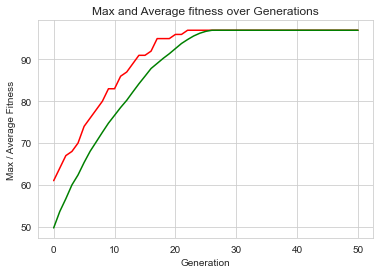

In [93]:
random.seed(42)

POPULATION_SIZE = 200
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.0001  # probability for mutating an individual
MAX_GENERATIONS = 50
HALL_OF_FAME_SIZE = 10

pop = toolbox.population(n=POPULATION_SIZE)
hof = tools.HallOfFame(10)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION, ngen=MAX_GENERATIONS, 
                                stats=stats, halloffame=hof, verbose=True)

#print(hof.items[0].fitness.values[0])

showGraph(log)
